# Gradient Descent

### Loss graph

$$ \text{loss}(w) = { 1 \over N} \sum^{N}_{n=1} (\hat{y_n}-y_n)^2 = { 1 \over N} \sum^{N}_{n=1} (w*x_n - y_n)^2 $$

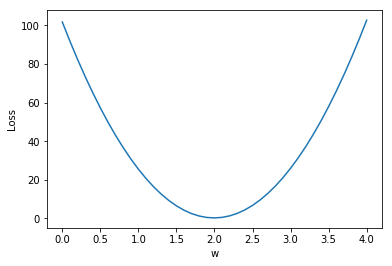

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1,  2,  3,  4,   5,   6,   7,   8]
y_data = [2,3.2,6.3,8.2,10.5,11.5,14.5,15.5]

# a lineadr model for the forward pass
def forward(x):
    return x * w

# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    loss_sum = 0
    for x, y in zip(x_data, y_data):
        loss_val = loss(x,y)
        loss_sum += loss_val
    w_list.append(w)
    mse_list.append(loss_sum / 8)
    
plt.plot(w_list, mse_list)
plt.xlabel('w')
plt.ylabel('Loss')
plt.show()

### What is the learning => find w that minimizes the loss

$$ {\min}_w  \text{loss}(w) $$

- 자동으로 loss가 최소가 되는 $w_{min}$을 구하는 방법론 ==> gradient descent
- 우선은 $w_{min}$ 에 대한 임의 추정치를 $w_0$라고 한다. 
  - 만약에 $w_0$ 가 $w_{min}$ 보다 크게 추정되었다면, 그 곳에서의 loss 함수의 기울기(gradient) 는 양수가 되고,  $w_0$ 를 좀 더 작게 해주어야 목적인 $w_{min}$ 에 근접하게 된다 
  - 만약에 $w_0$ 가 $w_{min}$ 보다 작게 추정되었다면, 그 곳에서의 loss 함수의 기울기(gradient) 는 음수가 되고,  $w_0$ 를 좀 더 크게 해주어야 목적인 $w_{min}$ 에 근접하게 된다 
  
<img src="https://i.ytimg.com/vi/b4Vyma9wPHo/maxresdefault.jpg" caption="Gradient Descent" width="500">

### Gradient descent algorithm


$$ \text{Gradient} \Rightarrow { \partial \text{loss} \over \partial w }$$
 


$$ w = w - \alpha {\partial \text{loss} \over \partial w}$$ 



$$ \text{loss} = (\hat{y} - y) ^2 = (w*x -y)^2 $$

$$ {\partial \text{loss} \over \partial w} = 2x(w*x - y)$$

 $$ w = w - \alpha * 2 * x (w*x - y)$$ 
 
 or you can use https://www.derivative-calculator.net 

progress: 0 w = 3.9549 loss = 1147.360077
progress: 10 w = 2.0196 loss = 1.84152
progress: 20 w = 1.9924 loss = 1.669003
progress: 30 w = 1.9921 loss = 1.669699
progress: 40 w = 1.9921 loss = 1.669709
predict (after training) 4 hours 7.968255510683977


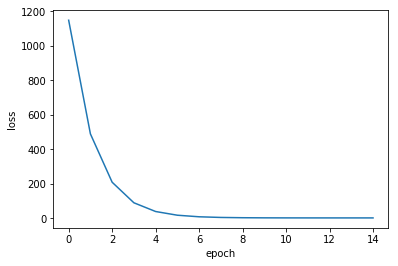

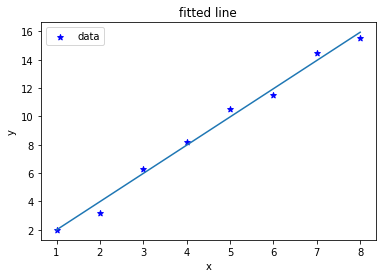

In [37]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1,  2,  3,  4,   5,   6,   7,   8]
y_data = [2,3.2,6.3,8.2,10.5,11.5,14.5,15.5]

x_arr = np.array(x_data)

w = 5.0  # a random guess (i.e. random value)

# a lineadr model for the forward pass
def forward(x):
    return x * w

# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

def gradient(x, y):
    return 2 * x * (x * w - y)

losses = []

for epoch in range(50):
    l = 0
    for x, y in zip(x_data, y_data):
        grad = gradient(x, y)
        w = w - 0.001 * grad
        # print('\t grad:', x, y, round(grad, 6))
        l += loss(x, y)
    losses.append(l)
    if (epoch%10 == 0) :    
        print("progress:", epoch, "w =", round(w,4), "loss =", round(l,6))
        
print("predict (after training)", "4 hours", forward(4))

plt.plot(range(15),losses[:15])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.scatter(x_data, y_data, label="data", color="b", marker="*")
plt.plot(x_arr, w*x_arr)
plt.xlabel('x')
plt.ylabel('y')
plt.title('fitted line')
plt.legend()
plt.show()

### Exercise 3.1 : Compute gradient


$$ \hat{y} = x^2w_2 + xw_1 + b $$


$$ \text{loss} = (\hat{y} - y)^2 = (x^2w_2 + xw_1 + b - y)^2 $$

$$ { { \partial \text{loss} } \over { \partial w_1 } } =  2x(x^2w_2 + xw_1 + b - y)$$

$$ {{\partial \text{loss} } \over {\partial w_2 }} = ? $$

### Exercise 3.2 : implement
